## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [0]:
##%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.set_random_seed(42)

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [4]:
print("No of samples in X_train: ", x_train.shape[0])
print("No of samples in y_train: ", y_train.shape[0])
print("No of samples in X_test: ", x_test.shape[0])
print("No of samples in y_test: ", y_test.shape[0])

No of samples in X_train:  60000
No of samples in y_train:  60000
No of samples in X_test:  10000
No of samples in y_test:  10000


### Find dimensions of an image in the dataset

In [5]:
print("Dimensions of image in Training set:", x_train.shape, y_train.shape)
print("Dimensions of image in Test set:", x_test.shape, y_test.shape)

Dimensions of image in Training set: (60000, 28, 28) (60000,)
Dimensions of image in Test set: (10000, 28, 28) (10000,)


In [6]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import keras

In [0]:
## One-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
y_train[0:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
## Converting to float and normalizing the data
x_train= x_train.astype('float32') / 255
x_test= x_test.astype('float32') / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
## Reshaping the image to grayscale and changing the dimension
x_train=x_train.reshape(x_train.shape[0],28,28,1)    # The digit 1 signifies the images are in grayscale
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [14]:
print("Dimensions of image in Training set:", x_train.shape, y_train.shape)
print("Dimensions of image in Test set:", x_test.shape, y_test.shape)

Dimensions of image in Training set: (60000, 28, 28, 1) (60000, 10)
Dimensions of image in Test set: (10000, 28, 28, 1) (10000, 10)


### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping


### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [16]:
# Create the sequential model
model= Sequential()
## Adding convolution layers with 32 filters of 3*3 size and mentioning input shape with relu activation
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

## Flattening the output of convolution layer
model.add(Flatten())

## Adding the dense layer with 128 neurons and relu activation layer
model.add(Dense(128, activation='relu'))
## Adding the output layer
model.add(Dense(10, activation='softmax'))

In [17]:
## Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fit the model
early_stopping = EarlyStopping(monitor='val_acc', patience=5, mode='auto')
callback_list = [early_stopping]

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32 , callbacks=callback_list)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 11s 185us/step - loss: 0.3668 - acc: 0.8680 - val_loss: 0.2947 - val_acc: 0.8917
Epoch 2/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.2302 - acc: 0.9132 - val_loss: 0.2587 - val_acc: 0.9034
Epoch 3/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.1630 - acc: 0.9385 - val_loss: 0.2464 - val_acc: 0.9142
Epoch 4/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.1148 - acc: 0.9566 - val_loss: 0.2611 - val_acc: 0.9164
Epoch 5/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.0785 - acc: 0.9710 - val_loss: 0.3077 - val_acc: 0.9165
Epoch 6/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0523 - acc: 0.9802 - val_loss: 0.3494 - val_acc: 0.9167
Epoch 7/10
60000/60

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [19]:
## Create a model
model1= Sequential()
## Adding convolution layers with 32 filters of 3*3 size and mentioning input shape with relu activation
model1.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
## Add pooling layer with filter size 2*2
model1.add(MaxPooling2D(pool_size=(2,2)))
## Adding a dropout rate of 0.25 
model1.add(Dropout(0.25))
## Flattening the output of convolution layer
model1.add(Flatten())
## Adding a dense layer with 128 neurons and relu activation
model1.add(Dense(128, activation='relu'))
## Adding the output layer
model1.add(Dense(10, activation='softmax'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
## Compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [21]:
# Fit the model
early_stopping = EarlyStopping(monitor='val_acc', patience=5, mode='auto')
callback_list = [early_stopping]

model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32 , callbacks=callback_list)

# Final evaluation of the model
scores = model1.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.3959 - acc: 0.8571 - val_loss: 0.3091 - val_acc: 0.8864
Epoch 2/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.2611 - acc: 0.9033 - val_loss: 0.2510 - val_acc: 0.9072
Epoch 3/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.2158 - acc: 0.9201 - val_loss: 0.2438 - val_acc: 0.9125
Epoch 4/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.1799 - acc: 0.9328 - val_loss: 0.2417 - val_acc: 0.9158
Epoch 5/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.1504 - acc: 0.9430 - val_loss: 0.2266 - val_acc: 0.9209
Epoch 6/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.1274 - acc: 0.9518 - val_loss: 0.2544 - val_acc: 0.9139
Epoch 7/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.1066 - acc: 0.9599 - val_loss: 0.2578 - 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

In [0]:
## Creating an object for Datagenerator with certain parameters
data_generator = ImageDataGenerator(rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
## Fit the generator on training images
data_generator.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

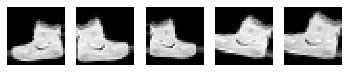

In [24]:
from matplotlib import pyplot as plt
gen = data_generator.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [25]:
model1.fit_generator(data_generator.flow(x_train,y_train,batch_size=32),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5892 - acc: 0.7813
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4618 - acc: 0.8276
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4264 - acc: 0.8403
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4037 - acc: 0.8502
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3858 - acc: 0.8554
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3776 - acc: 0.8618
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3628 - acc: 0.8644
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3567 - acc: 0.8666
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3497 - acc: 0.8692
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3417 - acc: 0.8734


###  Report the final train and validation accuracy

In [26]:
# Final evaluation of the model
Test_scores = model1.evaluate(x_test, y_test, verbose=0)
Train_scores = model1.evaluate(x_train, y_train, verbose=0)
print("Train Accuracy: %.2f%%" % (Train_scores[1]*100))
print("Validation Accuracy: %.2f%%" % (Test_scores[1]*100))

Train Accuracy: 90.91%
Validation Accuracy: 89.33%


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [29]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
## Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [31]:
y_train[0:2]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
## Creating a datagenerator
datagen = ImageDataGenerator(rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    horizontal_flip=True)

### **Prepare/fit the generator.**

In [0]:
## Fit on the training images 
datagen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

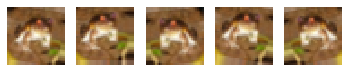

In [34]:
## Generating 5 images for the 1st image on train data
gen1 = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen1.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()